# TO DO
 * Add exogenous variables

# Multivariate Time Series Prediction with Keras LSTM

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters

In [6]:
num_samples = 5000
time_steps = 50
features = 1
batch_size = 128
epochs = 3

# Generate Data
Generated data must be of the shape (num_samples, time_steps, features).

Text(0, 0.5, 'y')

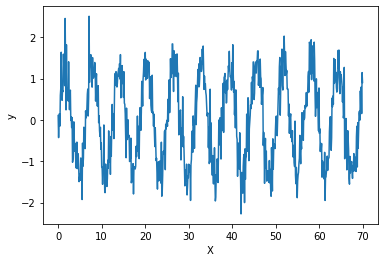

In [3]:
# Generate a time series
n = 1000
X = np.linspace(0,100, (n*features)).reshape((n, features))
y = np.sin(X) + np.random.normal(0,0.3, (n, features))

train_rows = int(len(X)*0.7)
val_rows = int(len(X)*0.2 + train_rows)

X_train = X[:train_rows]
X_val = X[train_rows:val_rows]
X_test = X[val_rows:]

y_train = y[:train_rows]
y_val = y[train_rows:val_rows]
y_test = y[val_rows:]

y_train = (y_train - np.mean(y_train))/(np.std(y_train))
y_val = (y_val - np.mean(y_train))/(np.std(y_train))
y_test = (y_test - np.mean(y_train))/(np.std(y_train))

plt.plot(X_train, y_train)
plt.xlabel("X")
plt.ylabel("y")

In [4]:
# Use Keras to create a generator with both time series sequences and their targets.
data_gen_train = TimeseriesGenerator(y_train, y_train,
                               length=time_steps, sampling_rate=1,
                               batch_size=batch_size)

data_gen_val = TimeseriesGenerator(y_val, y_val,
                               length=time_steps, sampling_rate=1,
                               batch_size=batch_size)

In [5]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(time_steps,features)))
model.add(LSTM(units=30))
model.add(Dense(units=128))
model.add(Dense(units=features))

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 30)            3840      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 15,257
Trainable params: 15,257
Non-trainable params: 0
_________________________________________________________________


In [7]:
#model.fit(X, Y, epochs=20, batch_size=32)

model.fit_generator(data_gen_train, steps_per_epoch = len(data_gen_train), epochs = epochs)

Epoch 1/3
6/6 [==============================] - 2s 349ms/step - loss: 0.8380 1s - loss: 0.7
Epoch 2/3
6/6 [==============================] - 0s 69ms/step - loss: 0.6358
Epoch 3/3
6/6 [==============================] - 0s 60ms/step - loss: 0.4819


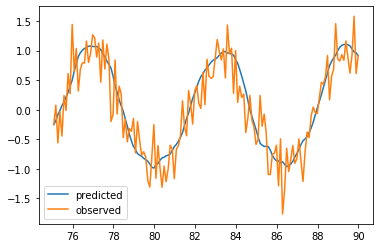

In [90]:
y_pred = model.predict(data_gen_val)

plt.plot(X_val[50:], y_pred, label = "predicted")
plt.plot(X_val[50:], y_val[50:], label = "observed")
plt.legend()

# 1-Dimensional CNN for Multivariate Time Series Prediction

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps,features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(features))
model.compile(optimizer='adam', loss='mse')

In [12]:
model.fit_generator(data_gen_train, steps_per_epoch = len(data_gen_train), epochs = epochs)

Epoch 1/3
6/6 [==============================] - 1s 166ms/step - loss: 0.4596
Epoch 2/3
6/6 [==============================] - 0s 46ms/step - loss: 0.2103
Epoch 3/3
6/6 [==============================] - 0s 38ms/step - loss: 0.1602


# 1-Dimensional LSTM-CNN

 * From <a href="https://www.kaggle.com/dimitreoliveira/deep-learning-for-time-series-forecasting">this post</a>.
 
 Input to the model should be in the following format: (samples, subsequences, timesteps, features).

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed

In [32]:
# Generate a time series
n = 1000
X = np.linspace(0,100, (n*features)).reshape((n, 1,1,features))
y = np.random.normal(0,0.3, (n, features))

train_rows = int(len(X)*0.7)
val_rows = int(len(X)*0.2 + train_rows)

X_train = X[:train_rows]
X_val = X[train_rows:val_rows]
X_test = X[val_rows:]

y_train = y[:train_rows]
y_val = y[train_rows:val_rows]
y_test = y[val_rows:]

y_train = (y_train - np.mean(y_train))/(np.std(y_train))
y_val = (y_val - np.mean(y_train))/(np.std(y_train))
y_test = (y_test - np.mean(y_train))/(np.std(y_train))

#plt.plot(X_train, y_train)
#plt.xlabel("X")
#plt.ylabel("y")

In [34]:
n_outputs = 1
subsequences = 1

In [35]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, 1,1)))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=subsequences)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(features))
model_cnn_lstm.compile(loss='mse', optimizer='adam')

model_cnn_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_14 (TimeDis (None, None, 1, 64)       128       
_________________________________________________________________
time_distributed_15 (TimeDis (None, None, 1, 64)       0         
_________________________________________________________________
time_distributed_16 (TimeDis (None, None, 64)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                23000     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 23,179
Trainable params: 23,179
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_cnn_lstm.fit(X_train, y_train, epochs = epochs)

Train on 700 samples
Epoch 1/3
700/700 [==============================] - 2s 3ms/sample - loss: 1.2949
Epoch 2/3
700/700 [==============================] - 0s 221us/sample - loss: 1.0246
Epoch 3/3
700/700 [==============================] - 0s 259us/sample - loss: 1.0386


# 2-D LSTM-CNN
 * From <a href="https://arxiv.org/abs/1506.04214v1">Convolutional LSTM Network: A Machine Learning Approach for Precipitation Nowcasting</a>.